# Optimisation: PSO

This example shows you how to run a global optimisation with [PSO (particle swarm optimisation)](http://pints.readthedocs.io/en/latest/optimisers/pso.html).

For a more elaborate example of an optimisation, see: https://github.com/martinjrobins/pints/blob/master/examples/optimisation-first-example.ipynb

Using Particle Swarm Optimisation (PSO)
Running in sequential mode.
Population size: 6
0: 45104432.5232
1: 41035064.2948
2: 36691976.4495
3: 12923045.8049
20: 700850.074536
40: 369464.137598
60: 109995.920408
80: 109995.920408
100: 109995.920408
120: 109995.920408
140: 109995.920408
160: 109995.920408
180: 109995.920408
200: 109995.920408
220: 109995.920408
240: 109995.920408
Halting: No significant change for 200 iterations.
251: 109995.920408
Score at true solution: 
105114.777705
Found solution:          True parameters:
 1.49924575937799322e-02     1.49999999999999994e-02
 5.03273466305923534e+02     5.00000000000000000e+02


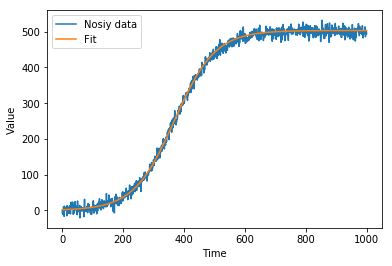

In [1]:
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as pl

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
values = model.simulate(real_parameters, times)

# Add noise
values += np.random.normal(0, 10, values.shape)

# Create an object with links to the model and time series
problem = pints.SingleSeriesProblem(model, times, values)

# Select a score function
score = pints.SumOfSquaresError(problem)

# Select some boundaries
boundaries = pints.Boundaries([0, 200], [1, 1000])

# Perform an optimization with boundaries and hints
x0 = [0, 700]
found_parameters, found_value = pints.optimise(
    score,
    x0,
    boundaries=boundaries,
    method=pints.PSO,
    )

# Show score of true solution
print('Score at true solution: ')
print(score(real_parameters))

# Compare parameters with original
print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

# Show quality of fit
pl.figure()
pl.xlabel('Time')
pl.ylabel('Value')
pl.plot(times, values, label='Nosiy data')
pl.plot(times, problem.evaluate(found_parameters), label='Fit')
pl.legend()
pl.show()